In [2]:
!pip install streamlit -q
!pip install pyngrok -q

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Step 1: Data Preprocessing

# Load the dataset
data = pd.read_csv("/content/vehicle_maintenance_data.csv")

# Check for missing values
print("Missing values before preprocessing:")
print(data.isnull().sum())

Missing values before preprocessing:
Vehicle_Model           0
Mileage                 0
Maintenance_History     0
Reported_Issues         0
Vehicle_Age             0
Fuel_Type               0
Transmission_Type       0
Engine_Size             0
Odometer_Reading        0
Last_Service_Date       0
Warranty_Expiry_Date    0
Owner_Type              0
Insurance_Premium       0
Service_History         0
Accident_History        0
Fuel_Efficiency         0
Tire_Condition          0
Brake_Condition         0
Battery_Status          0
Need_Maintenance        0
dtype: int64


In [4]:
# Handle missing or inconsistent data (for simplicity, we will drop rows with missing values)
data = data.dropna()

# Convert Last_Service_Date and Warranty_Expiry_Date to datetime format
data['Last_Service_Date'] = pd.to_datetime(data['Last_Service_Date'], errors='coerce')
data['Warranty_Expiry_Date'] = pd.to_datetime(data['Warranty_Expiry_Date'], errors='coerce')

# Create new feature: Days_Since_Last_Service
data['Days_Since_Last_Service'] = (pd.to_datetime('today') - data['Last_Service_Date']).dt.days

# Perform one-hot encoding for categorical variables
categorical_cols = ['Vehicle_Model', 'Fuel_Type', 'Transmission_Type', 'Owner_Type',
                    'Tire_Condition', 'Brake_Condition', 'Battery_Status', 'Maintenance_History']

# One-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Check the data types of the columns to identify any unexpected types
print("Data types after encoding:")
print(data_encoded.dtypes)

Data types after encoding:
Mileage                              int64
Reported_Issues                      int64
Vehicle_Age                          int64
Engine_Size                          int64
Odometer_Reading                     int64
Last_Service_Date           datetime64[ns]
Warranty_Expiry_Date        datetime64[ns]
Insurance_Premium                    int64
Service_History                      int64
Accident_History                     int64
Fuel_Efficiency                    float64
Need_Maintenance                     int64
Days_Since_Last_Service              int64
Vehicle_Model_Car                     bool
Vehicle_Model_Motorcycle              bool
Vehicle_Model_SUV                     bool
Vehicle_Model_Truck                   bool
Vehicle_Model_Van                     bool
Fuel_Type_Electric                    bool
Fuel_Type_Petrol                      bool
Transmission_Type_Manual              bool
Owner_Type_Second                     bool
Owner_Type_Third           

In [5]:
# Normalize or standardize numerical features
numerical_cols = ['Mileage', 'Engine_Size', 'Odometer_Reading', 'Fuel_Efficiency']

# Convert all relevant numerical columns to float before normalization
data_encoded[numerical_cols] = data_encoded[numerical_cols].astype(float)

# Initialize the scaler
scaler = StandardScaler()

# Normalize the numerical features
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Check for missing values after preprocessing
print("Missing values after preprocessing:")
print(data_encoded.isnull().sum())

# Ensure there are no remaining string columns
print("Data types after scaling:")
print(data_encoded.dtypes)

Missing values after preprocessing:
Mileage                     0
Reported_Issues             0
Vehicle_Age                 0
Engine_Size                 0
Odometer_Reading            0
Last_Service_Date           0
Warranty_Expiry_Date        0
Insurance_Premium           0
Service_History             0
Accident_History            0
Fuel_Efficiency             0
Need_Maintenance            0
Days_Since_Last_Service     0
Vehicle_Model_Car           0
Vehicle_Model_Motorcycle    0
Vehicle_Model_SUV           0
Vehicle_Model_Truck         0
Vehicle_Model_Van           0
Fuel_Type_Electric          0
Fuel_Type_Petrol            0
Transmission_Type_Manual    0
Owner_Type_Second           0
Owner_Type_Third            0
Tire_Condition_New          0
Tire_Condition_Worn Out     0
Brake_Condition_New         0
Brake_Condition_Worn Out    0
Battery_Status_New          0
Battery_Status_Weak         0
Maintenance_History_Good    0
Maintenance_History_Poor    0
dtype: int64
Data types after scal

In [6]:
# Step 2: Exploratory Data Analysis (EDA)

# Analyze Correlations
# Check for any remaining non-numeric columns before computing the correlation
if data_encoded.select_dtypes(include=['object']).empty:
    correlation_matrix = data_encoded.corr()
else:
    print("There are still non-numeric columns in the DataFrame.")

# Focus on the correlation with the target variable 'Need_Maintenance'
correlation_with_target = correlation_matrix['Need_Maintenance'].sort_values(ascending=False)
print("Correlation with Need_Maintenance:")
print(correlation_with_target)

Correlation with Need_Maintenance:
Need_Maintenance            1.000000
Reported_Issues             0.389273
Brake_Condition_Worn Out    0.342795
Battery_Status_Weak         0.341762
Maintenance_History_Poor    0.109371
Service_History             0.104155
Accident_History            0.080590
Vehicle_Model_Car           0.008658
Odometer_Reading            0.007876
Insurance_Premium           0.004775
Transmission_Type_Manual    0.004049
Vehicle_Model_Truck         0.003920
Fuel_Type_Electric          0.002300
Fuel_Efficiency             0.001874
Vehicle_Age                 0.000806
Mileage                     0.000704
Days_Since_Last_Service     0.000435
Owner_Type_Second           0.000423
Tire_Condition_New          0.000046
Vehicle_Model_Van          -0.000227
Engine_Size                -0.000326
Last_Service_Date          -0.000435
Owner_Type_Third           -0.001583
Tire_Condition_Worn Out    -0.005536
Vehicle_Model_SUV          -0.006047
Fuel_Type_Petrol           -0.006285
War

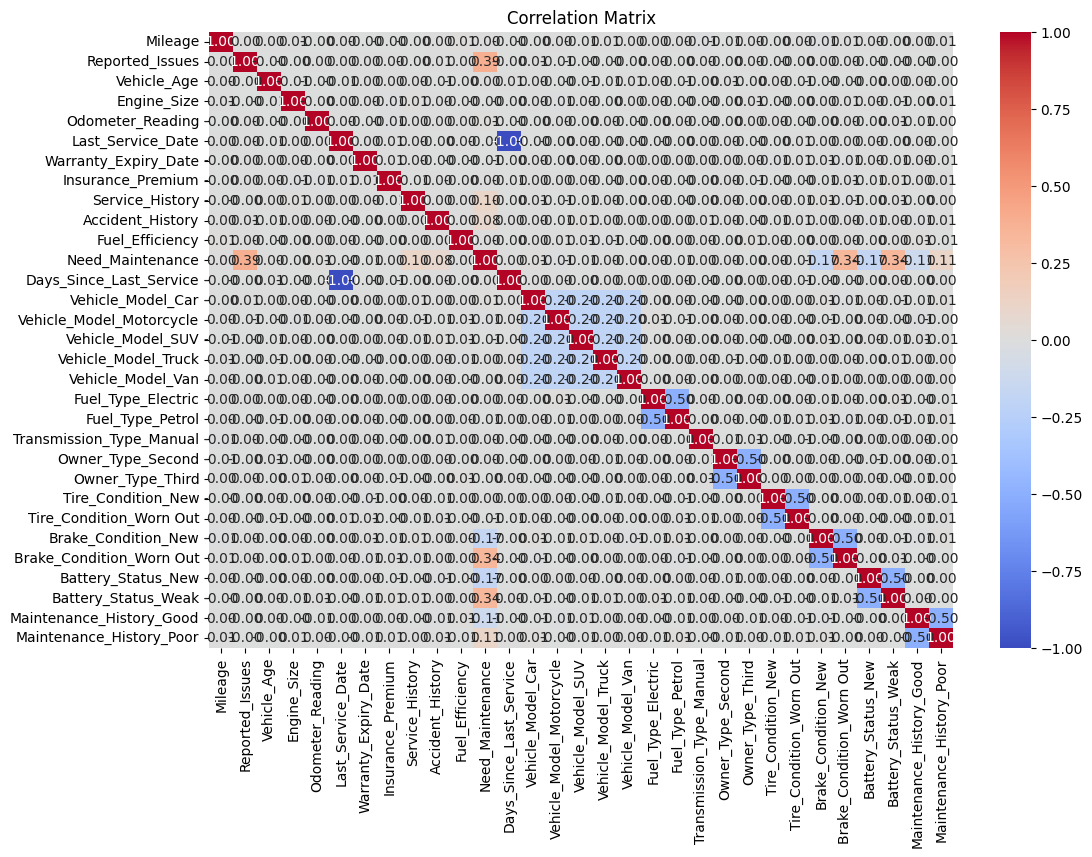

In [7]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

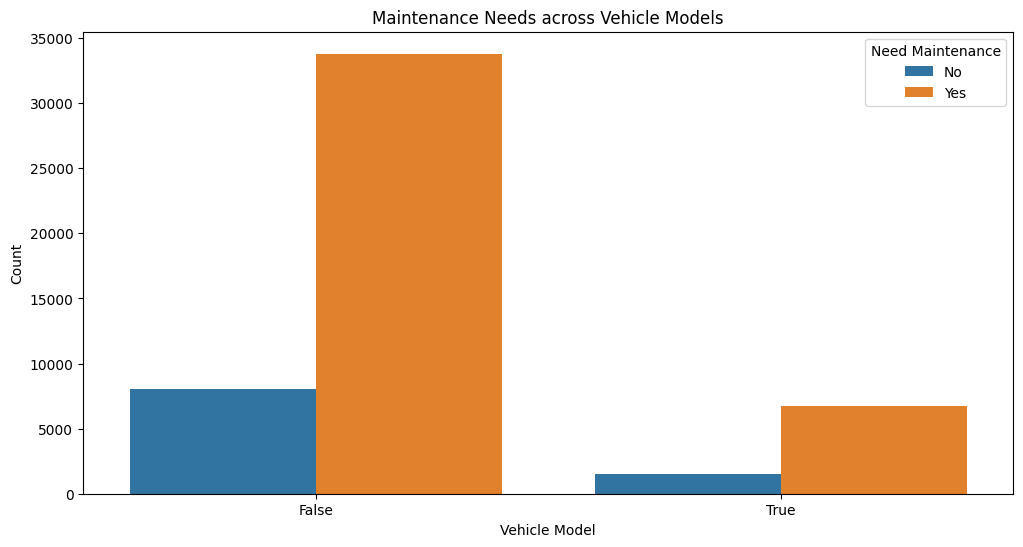

In [8]:
# Visualize Distributions
# a. Distribution of Maintenance Needs across Vehicle Models
plt.figure(figsize=(12, 6))
sns.countplot(data=data_encoded, x='Vehicle_Model_Car', hue='Need_Maintenance')
plt.title('Maintenance Needs across Vehicle Models')
plt.xlabel('Vehicle Model')
plt.ylabel('Count')
plt.legend(title='Need Maintenance', loc='upper right', labels=['No', 'Yes'])
plt.show()

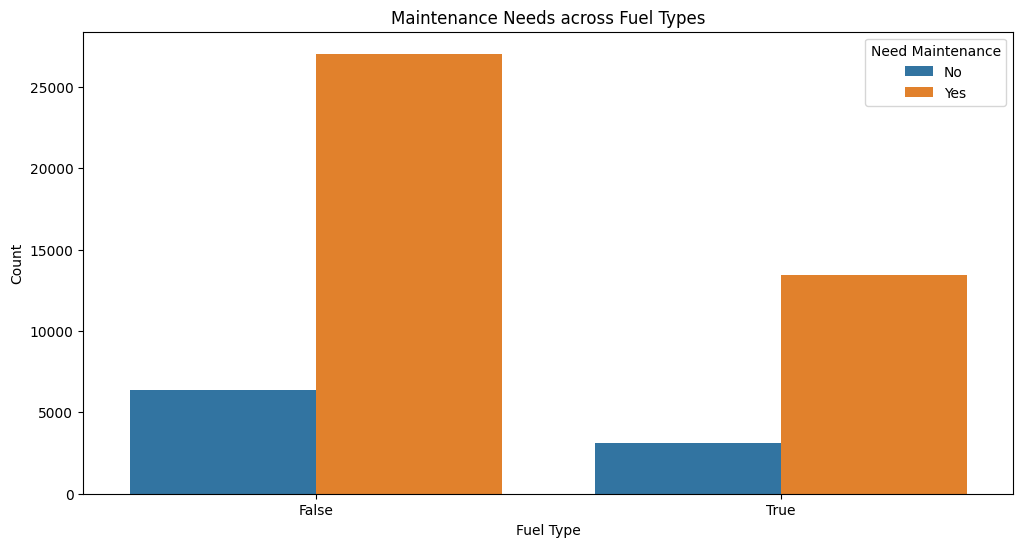

In [9]:
# b. Distribution of Maintenance Needs across Fuel Types
plt.figure(figsize=(12, 6))
sns.countplot(data=data_encoded, x='Fuel_Type_Electric', hue='Need_Maintenance')
plt.title('Maintenance Needs across Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.legend(title='Need Maintenance', loc='upper right', labels=['No', 'Yes'])
plt.show()

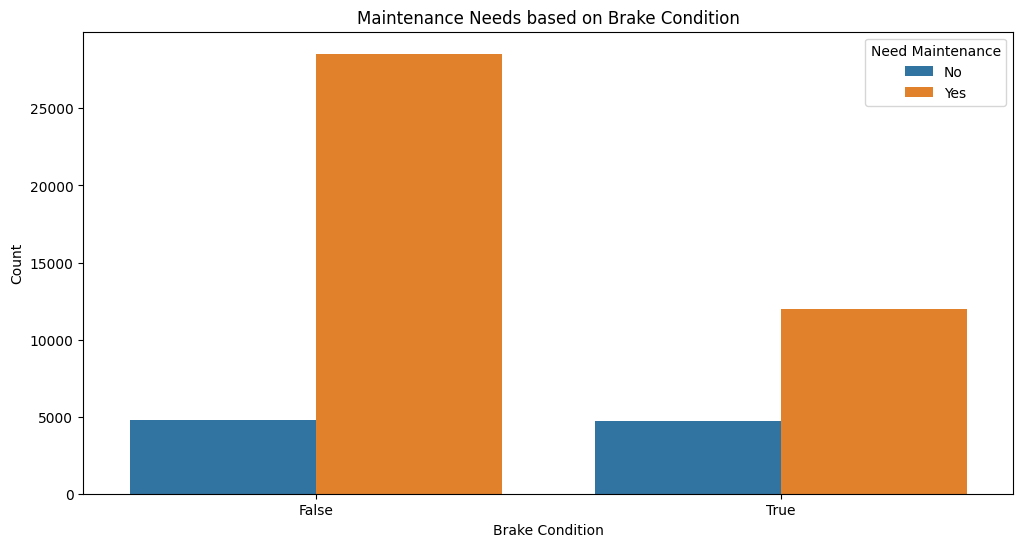

In [10]:
# c. Distribution of Maintenance Needs based on Brake Condition
plt.figure(figsize=(12, 6))
sns.countplot(data=data_encoded, x='Brake_Condition_New', hue='Need_Maintenance')
plt.title('Maintenance Needs based on Brake Condition')
plt.xlabel('Brake Condition')
plt.ylabel('Count')
plt.legend(title='Need Maintenance', loc='upper right', labels=['No', 'Yes'])
plt.show()

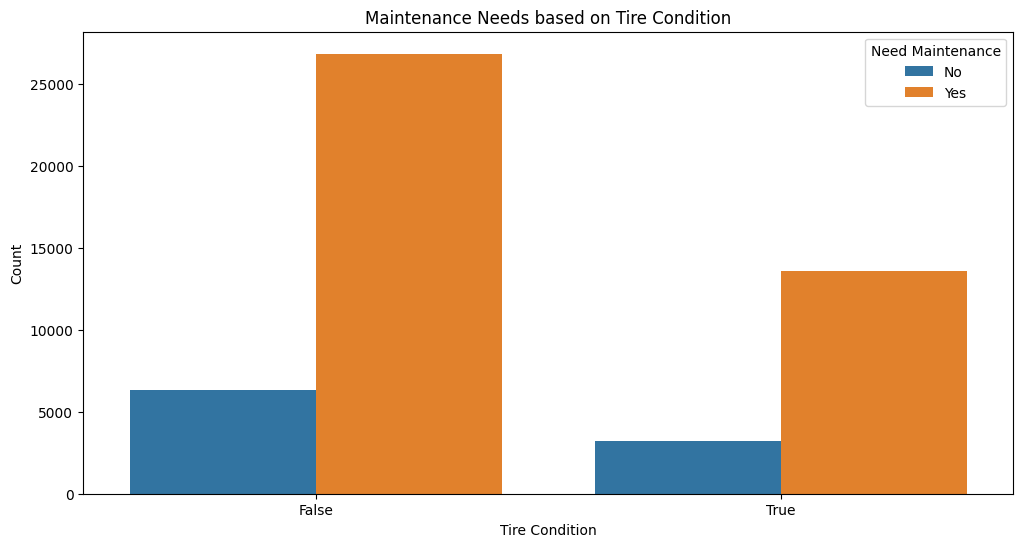

In [11]:
# d. Distribution of Maintenance Needs based on Tire Condition
plt.figure(figsize=(12, 6))
sns.countplot(data=data_encoded, x='Tire_Condition_New', hue='Need_Maintenance')
plt.title('Maintenance Needs based on Tire Condition')
plt.xlabel('Tire Condition')
plt.ylabel('Count')
plt.legend(title='Need Maintenance', loc='upper right', labels=['No', 'Yes'])
plt.show()

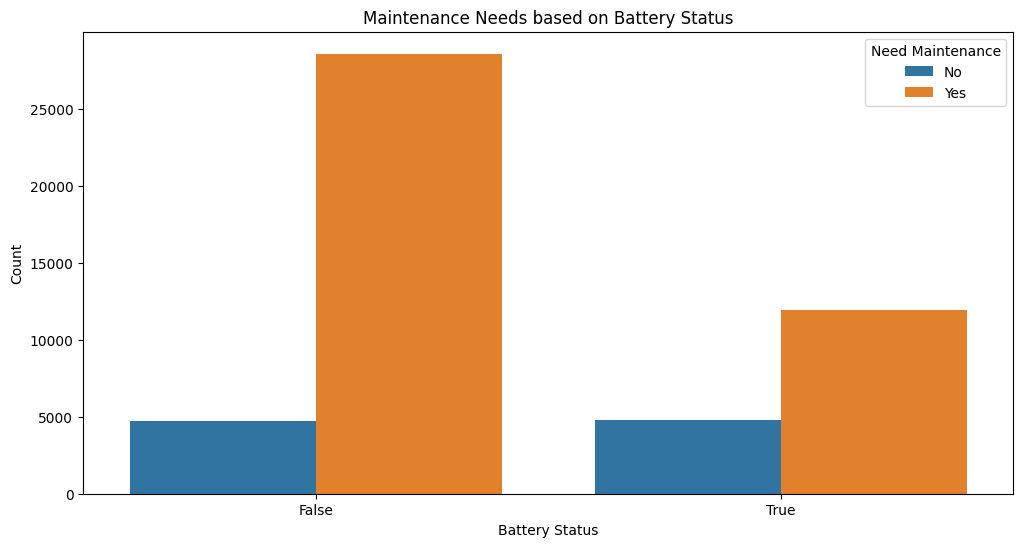

In [12]:
# e. Distribution of Maintenance Needs based on Battery Status
plt.figure(figsize=(12, 6))
sns.countplot(data=data_encoded, x='Battery_Status_New', hue='Need_Maintenance')
plt.title('Maintenance Needs based on Battery Status')
plt.xlabel('Battery Status')
plt.ylabel('Count')
plt.legend(title='Need Maintenance', loc='upper right', labels=['No', 'Yes'])
plt.show()

Missing values before preprocessing:
Vehicle_Model           0
Mileage                 0
Maintenance_History     0
Reported_Issues         0
Vehicle_Age             0
Fuel_Type               0
Transmission_Type       0
Engine_Size             0
Odometer_Reading        0
Last_Service_Date       0
Warranty_Expiry_Date    0
Owner_Type              0
Insurance_Premium       0
Service_History         0
Accident_History        0
Fuel_Efficiency         0
Tire_Condition          0
Brake_Condition         0
Battery_Status          0
Need_Maintenance        0
dtype: int64
Data types after encoding:
Mileage                         int64
Reported_Issues                 int64
Vehicle_Age                     int64
Engine_Size                     int64
Odometer_Reading                int64
Insurance_Premium               int64
Service_History                 int64
Accident_History                int64
Fuel_Efficiency               float64
Need_Maintenance                int64
Days_Since_Last_Service

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:01:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1915
           1       1.00      1.00      1.00      8085

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



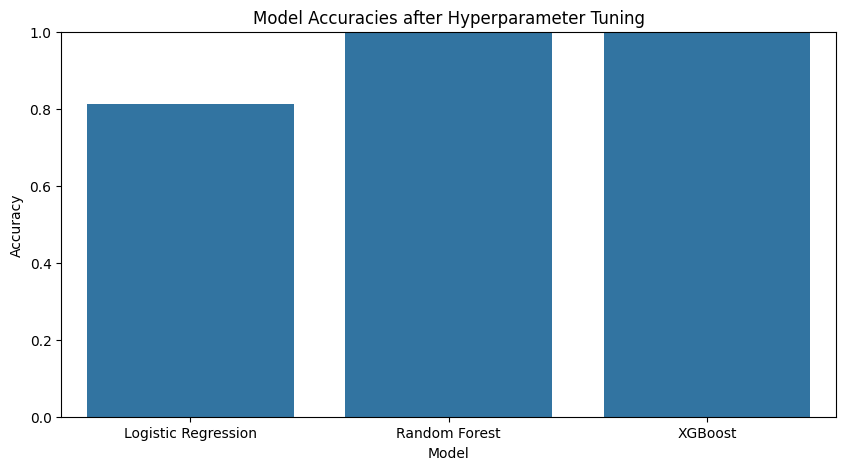

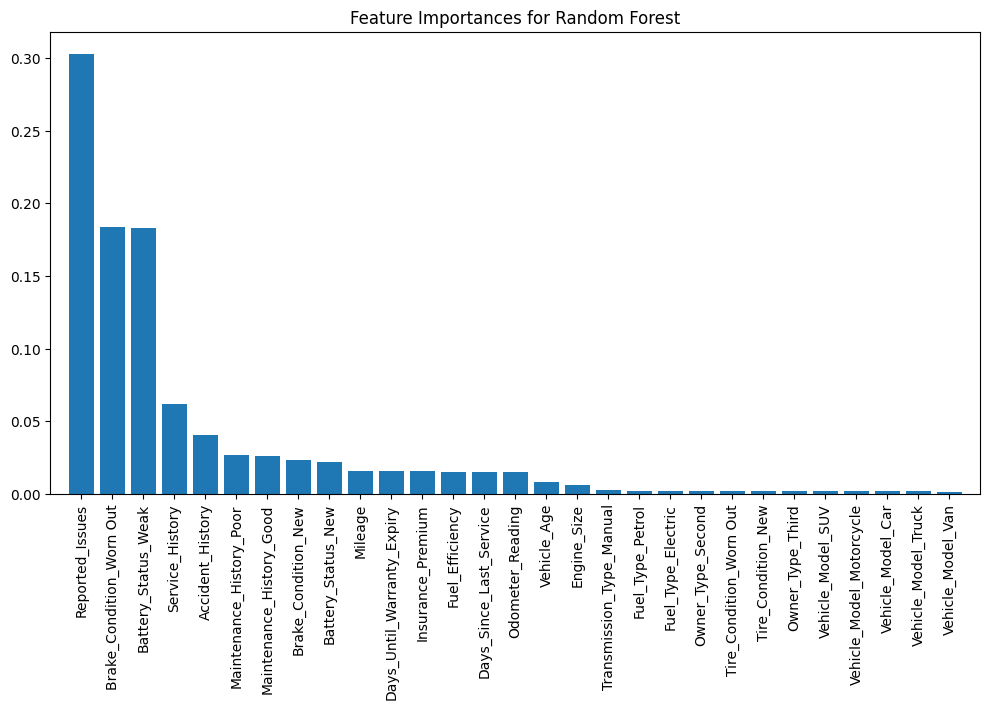

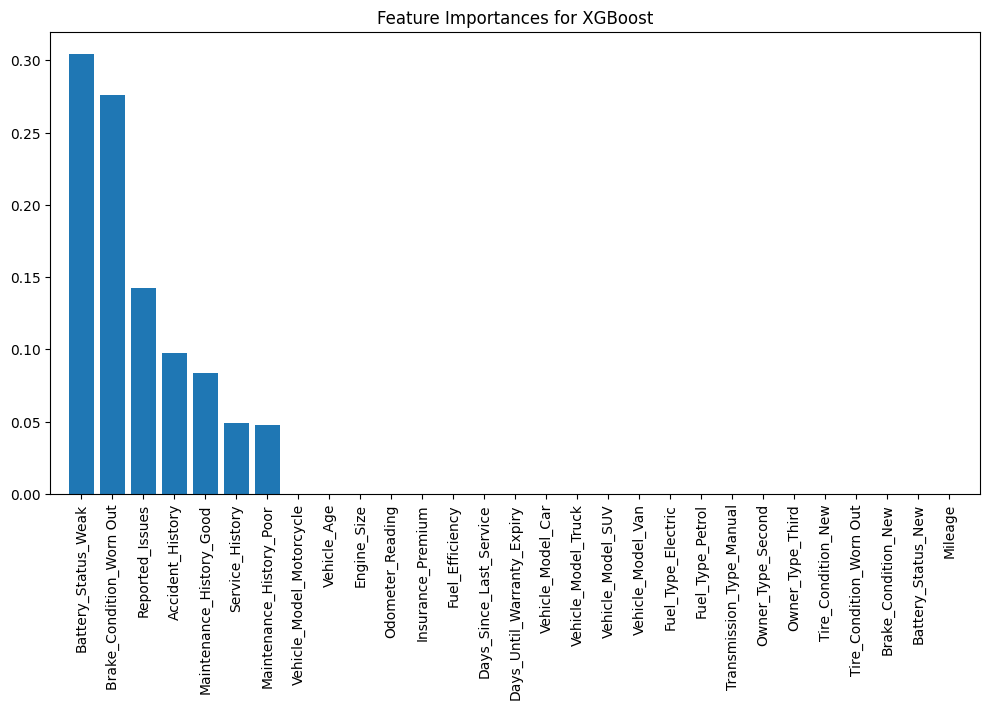

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Data Preprocessing

# Load the dataset
data = pd.read_csv("/content/vehicle_maintenance_data.csv")

# Check for missing values
print("Missing values before preprocessing:")
print(data.isnull().sum())

# Handle missing or inconsistent data (for simplicity, we will drop rows with missing values)
data = data.dropna()

# Convert Last_Service_Date and Warranty_Expiry_Date to datetime format
data['Last_Service_Date'] = pd.to_datetime(data['Last_Service_Date'], errors='coerce')
data['Warranty_Expiry_Date'] = pd.to_datetime(data['Warranty_Expiry_Date'], errors='coerce')

# Create new feature: Days_Since_Last_Service
data['Days_Since_Last_Service'] = (pd.to_datetime('today') - data['Last_Service_Date']).dt.days

# Create new feature: Days_Until_Warranty_Expiry
data['Days_Until_Warranty_Expiry'] = (data['Warranty_Expiry_Date'] - pd.to_datetime('today')).dt.days

# Drop the original date columns if no longer needed
data.drop(['Last_Service_Date', 'Warranty_Expiry_Date'], axis=1, inplace=True)

# Perform one-hot encoding for categorical variables
categorical_cols = ['Vehicle_Model', 'Fuel_Type', 'Transmission_Type', 'Owner_Type',
                    'Tire_Condition', 'Brake_Condition', 'Battery_Status', 'Maintenance_History']

# One-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Check the data types of the columns to identify any unexpected types
print("Data types after encoding:")
print(data_encoded.dtypes)

# Split your dataset into features and target variable
X = data_encoded.drop('Need_Maintenance', axis=1)
y = data_encoded['Need_Maintenance']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and their hyperparameters for tuning
models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=200),
        "params": {
            'C': [0.1, 1.0, 10.0],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "params": {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'subsample': [0.6, 0.8, 1.0]
        }
    }
}

# Store the best models and their accuracies
best_models = {}
accuracies = {}

# Train, evaluate, and tune models
for model_name, model_info in models.items():
    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(model_info["model"], model_info["params"], cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    best_models[model_name] = best_model
    accuracies[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# Plotting accuracies
plt.figure(figsize=(10, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title('Model Accuracies after Hyperparameter Tuning')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

# Feature Importance for Random Forest
plt.figure(figsize=(12, 6))
importances = best_models["Random Forest"].feature_importances_
indices = np.argsort(importances)[::-1]

plt.title('Feature Importances for Random Forest')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Feature Importance for XGBoost
plt.figure(figsize=(12, 6))
xgb_importances = best_models["XGBoost"].feature_importances_
indices_xgb = np.argsort(xgb_importances)[::-1]

plt.title('Feature Importances for XGBoost')
plt.bar(range(X_train.shape[1]), xgb_importances[indices_xgb], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices_xgb], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


Model: Logistic Regression
Accuracy: 0.951
Precision: 0.968
Recall: 0.971
F1 Score: 0.970
AUC-ROC: 0.988

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      1915
           1       0.97      0.97      0.97      8085

    accuracy                           0.95     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.95      0.95      0.95     10000



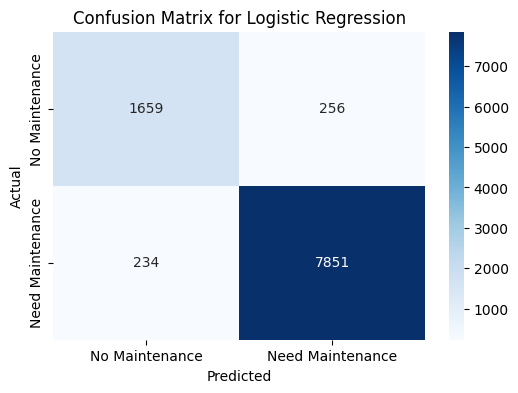

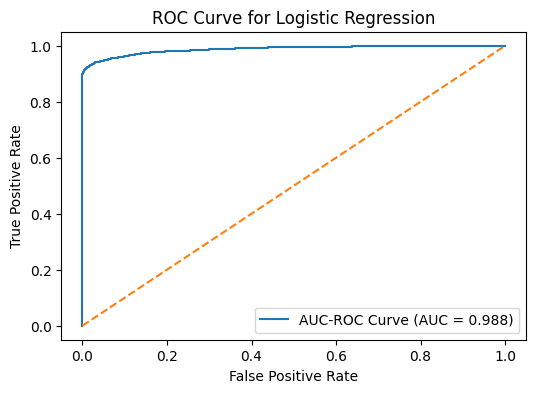

Model: Random Forest
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
AUC-ROC: 1.000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1915
           1       1.00      1.00      1.00      8085

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



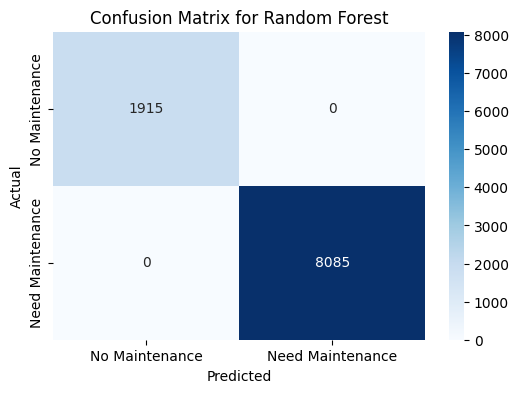

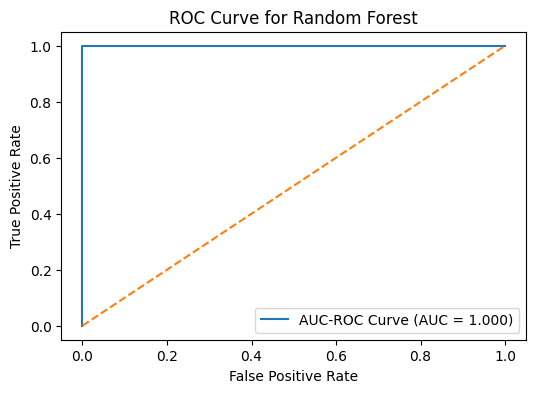

Model: XGBoost
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
AUC-ROC: 1.000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1915
           1       1.00      1.00      1.00      8085

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



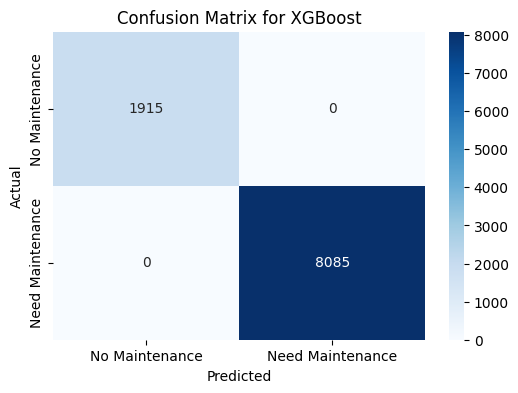

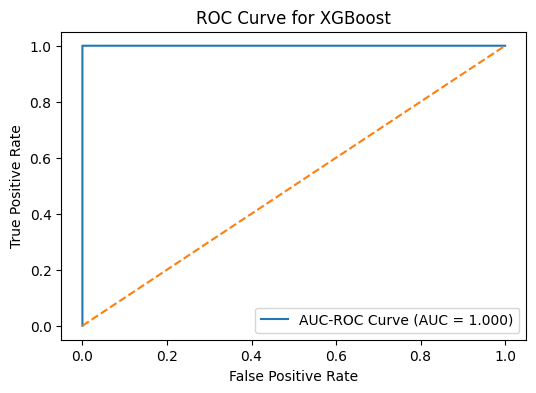

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Apply standard scaling to the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate models
def evaluate_model(model, X_test_scaled, y_test, model_name):
    # Predict on the test data
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]  # For ROC and AUC, we need the predicted probabilities

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba)

    # Print classification report
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print(f"AUC-ROC: {auc_roc:.3f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Maintenance', 'Need Maintenance'], yticklabels=['No Maintenance', 'Need Maintenance'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'AUC-ROC Curve (AUC = {auc_roc:.3f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title(f'ROC Curve for {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

# Define and train the logistic regression model
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

# Define and train the Random Forest model
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scaled, y_train)

# Define and train the XGBoost model
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scaled, y_train)

# Evaluate the logistic regression model
evaluate_model(model_lr, X_test_scaled, y_test, "Logistic Regression")

# Evaluate the Random Forest model
evaluate_model(model_rf, X_test_scaled, y_test, "Random Forest")

# Evaluate the XGBoost model
evaluate_model(model_xgb, X_test_scaled, y_test, "XGBoost")


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pickle

# Cargar los datos
data = pd.read_csv('/content/vehicle_maintenance_data.csv')

# Manejar valores nulos si es necesario
data.dropna(inplace=True)  # Eliminar filas con valores nulos

# Convertir columnas de fecha a tipo datetime
data['Last_Service_Date'] = pd.to_datetime(data['Last_Service_Date'])
data['Warranty_Expiry_Date'] = pd.to_datetime(data['Warranty_Expiry_Date'])

# Extraer características numéricas de las fechas
data['Days_Since_Last_Service'] = (pd.Timestamp.now() - data['Last_Service_Date']).dt.days
data['Days_To_Warranty_Expiry'] = (data['Warranty_Expiry_Date'] - pd.Timestamp.now()).dt.days

# Eliminar columnas de fecha que ya no se necesitan
data.drop(['Last_Service_Date', 'Warranty_Expiry_Date'], axis=1, inplace=True)

# Separar las características (X) y la etiqueta objetivo (y)
X = data.drop('Need_Maintenance', axis=1)
y = data['Need_Maintenance']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento: One-Hot Encoding para las columnas categóricas
categorical_features = ['Fuel_Type', 'Transmission_Type', 'Vehicle_Model',
                        'Maintenance_History', 'Tire_Condition',
                        'Brake_Condition', 'Battery_Status', 'Owner_Type']
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# Construir el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough')  # Pasar las columnas numéricas sin cambios

# Crear el pipeline del modelo con preprocesamiento y modelo RandomForest
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Entrenar el modelo
model_pipeline.fit(X_train, y_train)

# Guardar el modelo entrenado como un archivo pickle
with open('vehicle_model.pkl', 'wb') as model_file:
    pickle.dump(model_pipeline, model_file)

# Evaluar el modelo
accuracy = model_pipeline.score(X_test, y_test)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


In [16]:
%%writefile app.py
import streamlit as st
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Simulate a pre-trained model (normally you would load a saved model)
model = RandomForestClassifier()

# Example data to train a basic model (for demonstration purposes)
data = pd.DataFrame({
    'Mileage': [15000, 30000],
    'Reported_Issues': [1, 0],
    'Vehicle_Age': [5, 3],
    'Engine_Size': [2000, 1600],
    'Odometer_Reading': [50000, 45000],
    'Fuel_Efficiency': [15, 18],
    'Tire_Condition': [2, 1],
    'Brake_Condition': [2, 1],
    'Battery_Status': [1, 0]  # Target variable: 1 = Needs maintenance, 0 = Does not need maintenance
})
X = data.drop('Battery_Status', axis=1)
y = data['Battery_Status']
model.fit(X, y)

# Encode categorical variables (for Tire_Condition and Brake_Condition)
label_encoder = LabelEncoder()
conditions = ['New', 'Used', 'Worn']
label_encoder.fit(conditions)

# Streamlit app title
st.title('Vehicle Maintenance Prediction App 🚗')

# Sidebar inputs for user data
st.sidebar.header('Enter Vehicle Information')

def user_input_features():
    Mileage = st.sidebar.number_input('Mileage (km)', min_value=0)
    Reported_Issues = st.sidebar.number_input('Reported Issues', min_value=0)
    Vehicle_Age = st.sidebar.number_input('Vehicle Age (years)', min_value=0)
    Engine_Size = st.sidebar.number_input('Engine Size (cc)', min_value=0)
    Odometer_Reading = st.sidebar.number_input('Odometer Reading (km)', min_value=0)
    Fuel_Efficiency = st.sidebar.number_input('Fuel Efficiency (km/l)', min_value=0.0)
    Tire_Condition = st.sidebar.selectbox('Tire Condition', ('New', 'Used', 'Worn'))
    Brake_Condition = st.sidebar.selectbox('Brake Condition', ('New', 'Used', 'Worn'))

    # Convert Tire_Condition and Brake_Condition to numeric using LabelEncoder
    Tire_Condition_encoded = label_encoder.transform([Tire_Condition])[0]
    Brake_Condition_encoded = label_encoder.transform([Brake_Condition])[0]

    data = {
        'Mileage': Mileage,
        'Reported_Issues': Reported_Issues,
        'Vehicle_Age': Vehicle_Age,
        'Engine_Size': Engine_Size,
        'Odometer_Reading': Odometer_Reading,
        'Fuel_Efficiency': Fuel_Efficiency,
        'Tire_Condition': Tire_Condition_encoded,
        'Brake_Condition': Brake_Condition_encoded
    }
    return pd.DataFrame(data, index=[0])

input_df = user_input_features()

# Display user inputs
st.subheader('User Input:')
st.write(input_df)

# Prediction button
if st.sidebar.button('Predict'):
    prediction = model.predict(input_df)
    prediction_proba = model.predict_proba(input_df)

    # Display prediction result
    st.subheader('Prediction:')
    result = 'Needs Maintenance' if prediction[0] == 1 else 'No Maintenance Needed'
    st.write(result)

    # Display probability of needing maintenance
    st.subheader('Prediction Probability:')
    st.write(f"Probability of needing maintenance: {prediction_proba[0][1] * 100:.2f}%")

    # Recommendations based on the result
    st.subheader('Recommended Actions:')
    if prediction[0] == 1:
        st.write("""
        - Inspect the tires and brakes for wear.
        - Check the fuel efficiency and engine performance.
        - Schedule a maintenance appointment with a mechanic.
        """)
    else:
        st.write("""
        - No immediate maintenance is needed.
        - Continue regular checks and maintenance.
        """)

# Footer with developer information
st.markdown("<hr>", unsafe_allow_html=True)  # Horizontal line for separation
st.write("Developed by Rim El Abrouki")

Writing app.py


In [17]:
! pip install streamlit -q

In [18]:
!wget -q -O - ipv4.icanhazip.com

34.16.143.48


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.143.48:8501

your url is: https://ten-cobras-sin.loca.lt
